In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_rows', 20)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [3]:
AQI_FILEPATH = os.path.join(os.curdir, 'data', 'aqi.csv')

df = pd.read_csv(filepath_or_buffer=AQI_FILEPATH, parse_dates=['datetime'], index_col='datetime', na_values='NR')
df_bak = df.copy()

# 保留降雨量為 NR 值的資料
df_withnr = pd.read_csv(filepath_or_buffer=AQI_FILEPATH, parse_dates=['datetime'], index_col='datetime')
df_withnr_bak = df_withnr.copy()

# 保留還未將 datetime 設為 index 的資料
df_noindex = pd.read_csv(filepath_or_buffer=AQI_FILEPATH)
df_noindex_bak = df_noindex.copy()

# 讀取未處理過的原始資料
AQI_ORIG_FILEPATH = os.path.join(os.curdir, 'data', 'aqi_original.csv')

df_orig = pd.read_csv(AQI_ORIG_FILEPATH)
df_orig_bak = df_orig.copy()

# 讀取還未使用 pivot_table() 處理過的資料
AQI_NOPIVOT_FILEPATH = os.path.join(os.curdir, 'data', 'aqi_nopivot.csv')

df_nopivot = pd.read_csv(AQI_NOPIVOT_FILEPATH, na_values=['NR'])
df_nopivot.replace(r'[-]?\D*[.]?\D*[#*x]+', np.nan, regex=True, inplace=True)
df_nopivot.loc[:, 'value'] = df_nopivot.loc[:, 'value'].astype(np.float64)
df_nopivot_bak = df_orig.copy()

In [4]:
df.head()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,20.0,2.0,0.20,0.04,1.7,7.5,9.2,25.0,67.0,18.0,NaN,88.0,1.5,2.0,33.0,37.0,1.4,0.1
2017-01-01 01:00:00,20.0,2.2,0.19,0.05,1.9,7.9,9.8,18.0,52.0,14.0,NaN,88.0,2.1,2.2,76.0,143.0,0.5,0.6
2017-01-01 02:00:00,19.0,2.2,0.24,0.08,2.0,9.3,11.0,13.0,59.0,17.0,NaN,89.0,2.0,2.3,140.0,142.0,0.5,0.6
2017-01-01 03:00:00,19.0,2.4,0.24,0.11,1.4,9.5,11.0,8.5,53.0,24.0,NaN,90.0,1.8,2.5,107.0,51.0,0.5,0.4
2017-01-01 04:00:00,18.0,3.4,0.23,0.12,6.8,11.0,17.0,1.8,37.0,25.0,NaN,90.0,1.7,3.6,96.0,106.0,1.0,0.5


# 第 5 章：計算

## 四則運算

在 Pandas 內做四則運算是相當容易的，只要加上對應的運算子 `+`, `-`, `*`, `/` 就可以了。

In [5]:
# 例：計算總懸浮微粒(TSP)
# 單位：μg／m3(微克／立方公尺)
# 
# 參考資料：http://terms.naer.edu.tw/detail/1320663/
# 節錄：
# 懸浮在空氣中之粒狀物質之總稱，包括10微米以下可被人體呼吸道吸入者，及10微米以上者，兩者總合稱為總懸浮微粒。
# 總懸浮微粒為評量大氣中粒狀物質污染程度之指標。
# 中華民國台灣地區環境空氣品質標準所定之總懸浮微粒濃度二十四小時平均值為 250μg/m3，年幾何平均值為 130μg/m3。
df['TSP'] = df['PM10'] + df['PM2.5']
df['TSP']

datetime
2017-01-01 00:00:00     85.0
2017-01-01 01:00:00     66.0
2017-01-01 02:00:00     76.0
2017-01-01 03:00:00     77.0
2017-01-01 04:00:00     62.0
2017-01-01 05:00:00     85.0
2017-01-01 06:00:00     74.0
2017-01-01 07:00:00     96.0
2017-01-01 08:00:00     91.0
2017-01-01 09:00:00    120.0
                       ...  
2017-12-31 14:00:00    308.0
2017-12-31 15:00:00    271.0
2017-12-31 16:00:00    257.0
2017-12-31 17:00:00    207.0
2017-12-31 18:00:00    159.0
2017-12-31 19:00:00    141.0
2017-12-31 20:00:00    130.0
2017-12-31 21:00:00    135.0
2017-12-31 22:00:00    123.0
2017-12-31 23:00:00    112.0
Name: TSP, Length: 8760, dtype: float64

## Date Type 相關

### `.astype()` :  轉換 Data Type (dtype)

每一筆資料都帶有不同的 Column，記錄著不同的資料，這些資料的型態有可能為文字、數值、時間等等，要幫資料賦予正確資料型態，才有辦法做相對應的處理。

參考文件：

* [pandas.DataFrame.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html)
* [pandas.Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html)


In [6]:
# 觀察大氣溫度 (column label: 'AMB_TEMP') 的資料型態
df.dtypes['AMB_TEMP']

dtype('float64')

In [7]:
# 再將大氣溫度轉換成文字型態 (str)
df['AMB_TEMP'] = df['AMB_TEMP'].astype(str)
# 觀察變化
df.dtypes['AMB_TEMP']

dtype('O')

In [8]:
df.dtypes

AMB_TEMP       object
CH4           float64
CO            float64
NMHC          float64
NO            float64
NO2           float64
NOx           float64
O3            float64
PM10          float64
PM2.5         float64
RAINFALL      float64
RH            float64
SO2           float64
THC           float64
WD_HR         float64
WIND_DIREC    float64
WIND_SPEED    float64
WS_HR         float64
TSP           float64
dtype: object

In [9]:
# 再將大氣溫度轉換成浮點數型態 (float)
df['AMB_TEMP'] = df['AMB_TEMP'].astype(float)
# 觀察變化
df.dtypes['AMB_TEMP']

dtype('float64')

### `pandas.to_datetime()`：自動轉換日期資料，並將 Date Type 轉換為 datetime

當資料中有關於與日期相關的 column 時，可以考慮轉換成 `datetime` 的 data type 以利處理。

轉換的情境有兩個：

1. 某個 column 有時間日期的相關資料，如 `2018-01-01`, `2018/01/01`, `20180101`, `20180101 01:00:00`......等
1. 分散在多個 column 的日期相關資料，如 `pd.DataFrame({'year':[2018], 'month':[1], 'day': [1]]})`

Pandas 在處理的時候，會依照部分預設的規則，去猜測時間日期的格式進而轉換，當然也可以手動設定時間日期格式。

* 常用 Parameters：
    1. `format`：時間日期的格式，例如 `%d-%m-%y` 即為「年-月-日」的格式。有關日期格式的指定方法，請參見 Python 官方文件中，有關 [`strftime()`  和 `strptime()` function 的說明])(https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)
    1. `infer_datetime_format`：是否要在沒有指定時間日期格式的情況，自行推論日期格式。
        * `True`：選擇讓 Pandas 推論時間日期格式。如果確定資料格式是可以被推論的，將此 Parameter 設為 True 時，將可以加快處理的速度。
        * `False`：選擇不讓 Pandas 推論時間日期格式。通常設定為 `False` 時，會搭配設定時間日期格式。
* 參考文件：
    * [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
    * [Time Series / Date functionality | Converting to Timestamps](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#converting-to-timestamps)

In [10]:
pd.to_datetime(df_noindex['datetime'])

0      2017-01-01 00:00:00
1      2017-01-01 01:00:00
2      2017-01-01 02:00:00
3      2017-01-01 03:00:00
4      2017-01-01 04:00:00
5      2017-01-01 05:00:00
6      2017-01-01 06:00:00
7      2017-01-01 07:00:00
8      2017-01-01 08:00:00
9      2017-01-01 09:00:00
               ...        
8750   2017-12-31 14:00:00
8751   2017-12-31 15:00:00
8752   2017-12-31 16:00:00
8753   2017-12-31 17:00:00
8754   2017-12-31 18:00:00
8755   2017-12-31 19:00:00
8756   2017-12-31 20:00:00
8757   2017-12-31 21:00:00
8758   2017-12-31 22:00:00
8759   2017-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[ns]

In [11]:
%timeit pd.to_datetime(df_noindex['datetime'])

2.72 ms ± 418 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%timeit pd.to_datetime(df_noindex['datetime'], infer_datetime_format=True)

3.71 ms ± 172 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## DataFrame 常用運算方法


### `.min()` : 計算最小值

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件：
    * [pandas.DataFrame.min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html)
    * [pandas.Series.min](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.min.html)


In [36]:
# 例：計算各空氣品質監測項目的最小值
df.min()

AMB_TEMP      13.00
CH4            1.70
CO             0.02
NMHC          -0.03
NO            -0.50
NO2            0.70
NOx            1.30
O3             1.00
PM10           9.00
PM2.5          2.00
RAINFALL       0.20
RH            29.00
SO2            0.00
THC            1.70
WD_HR          0.00
WIND_DIREC     0.00
WIND_SPEED     0.40
WS_HR          0.00
TSP           11.00
dtype: float64

### `.max()`：計算最大值

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件
    * [pandas.DataFrame.max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)
    * [pandas.Series.max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html)

    


In [37]:
# 例：計算各空氣品質監測項目的最大值
df.max()

AMB_TEMP       34.00
CH4             8.60
CO              1.84
NMHC            3.09
NO             38.00
NO2            38.00
NOx            65.00
O3            105.00
PM10          549.00
PM2.5         121.00
RAINFALL       72.00
RH             93.00
SO2            43.00
THC             8.60
WD_HR         360.00
WIND_DIREC    360.00
WIND_SPEED     12.00
WS_HR          10.00
TSP           586.00
dtype: float64

### `.mean()`：計算平均值

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件
    * [pandas.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)
    * [pandas.Series.mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)



In [38]:
# 例：計算各空氣品質監測項目的平均值
df.mean()

AMB_TEMP       24.590633
CH4             2.034242
CO              0.281980
NMHC            0.072598
NO              2.197697
NO2             9.169885
NOx            11.363841
O3             31.892605
PM10           70.665159
PM2.5          27.819263
RAINFALL        3.712289
RH             78.943999
SO2             2.953423
THC             2.105518
WD_HR         111.034743
WIND_DIREC    113.507639
WIND_SPEED      3.393404
WS_HR           2.495462
TSP            98.328892
dtype: float64

### `.std()`：計算標準差

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件：
    * [pandas.DataFrame.std](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)
    * [pandas.Series.std](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html)

In [39]:
# 例：計算各空氣品質監測項目的標準差
df.std()

AMB_TEMP        5.065055
CH4             0.334770
CO              0.133750
NMHC            0.077559
NO              2.084884
NO2             5.037761
NOx             6.142313
O3             17.085349
PM10           48.478237
PM2.5          15.274430
RAINFALL        8.064943
RH              9.033272
SO2             1.877609
THC             0.366224
WD_HR         101.564899
WIND_DIREC    102.146535
WIND_SPEED      2.139149
WS_HR           1.829496
TSP            57.952604
dtype: float64

### `.median()`：計算中位數

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件：
    * [pandas.DataFrame.median](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html)
    * [pandas.Series.median](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.median.html)




In [40]:
# 例：計算各空氣品質監測項目的中位數
df.median()

AMB_TEMP      25.00
CH4            1.90
CO             0.26
NMHC           0.06
NO             1.70
NO2            8.00
NOx            9.90
O3            30.00
PM10          59.00
PM2.5         24.00
RAINFALL       0.80
RH            80.00
SO2            2.40
THC            2.00
WD_HR         68.00
WIND_DIREC    71.00
WIND_SPEED     2.90
WS_HR          2.00
TSP           85.00
dtype: float64

### .quantile()：計算分位數

* 常用 Parameters : 
    1. `q` : 分位數，預設為 0.5。可以輸入
        * 浮點數 `float` (例如 `0.25`, `0.5`, `0.75`)：計算一個分位數
        * `array-like` （可迭代）的物件 (例如 \[0.25, 0.5\])：計算多個分位數
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `numeric_only`：是否僅允許輸入數值型資料，預設為 `True`
        * `True`：只計算數值型資料
        * `False`：不只數值型資料，若資料中包含 `datetime` 和 `timedelta` 也會計算
    1. `interpolation` : 插補法，預設為 `linear`（線性）
* 參考文件：
    * [pandas.DataFrame.quantile](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)
    * [pandas.Series.quantile](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.quantile.html)

> 備註：
>
> 計算分位數時，如果資料中有包含 NA，則會自動忽略此筆資料。
> 
> 例如有 10 筆資料，其中一筆為 NA，則計算時只會拿 9 筆資料來計算分位數。

In [18]:
# 例：計算各空氣品質監測項目的「第一四分位數」和「第三四分位數」
df.quantile(q=[0.25, 0.75])

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,TSP
0.25,20.0,1.9,0.19,0.04,1.1,5.5,7.1,19.0,42.0,18.0,0.4,73.0,1.8,1.9,24.5,27.0,1.7,1.1,60.0
0.75,29.0,2.1,0.35,0.09,2.6,12.0,14.0,43.0,83.0,35.0,3.2,86.0,3.5,2.2,192.0,196.0,4.7,3.3,120.0


#### 名詞釋疑

與 Quantile 相關的數值有三個：

1. `Quantile`: 分位數
1. `Quartile`: 四分位數
1. `Percentile`: 百分位數

其中的對應關係如下：

* `0` quartile = `0` quantile = `0` percentile
* `1` quartile = `0.25` quantile = `25` percentile = 第一四分位數 = 下四分位數
* `2` quartile = `.5` quantile = `50` percentile = median = 第二四分位數 = 中位數
* `3` quartile = `.75` quantile = `75` percentile = 第三四分位數 = 上四分位數
* `4` quartile = `1` quantile = `100` percentile

參考資料：[Percentile vs quantile vs quartile | StackExchange](https://stats.stackexchange.com/a/156787)

### `.mode()` : 計算眾數 

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件：
    * [pandas.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html)
    * [pandas.Series.mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mode.html)




In [41]:
# 例：計算各空氣品質監測項目的眾數
df.mode()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,TSP
0,29.0,1.9,0.19,0.04,1.3,11.0,11.0,35.0,42.0,20.0,0.2,86.0,1.9,1.9,11.0,11.0,1.9,1.0,52.0


### `.sum()`：計算總和

* 常用 Parameters：
    1. `min_count` : 設定非遺漏值的最小數量，預設為 `0`
        * `0` : 若 Series 中全部是 `NaN` 或是空值，則回傳 `0.0`
        * 其他數值 : 若 Series 中非 `NaN` 的數值筆數小於 `min_count` 所設定的數量 ，則回傳 `NaN`
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件：
    * [pandas.DataFrame.sum](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)
    * [pandas.Series.sum](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sum.html)

In [20]:
# 例：計算年降雨量
df['RAINFALL'].sum()

1540.6

> 備註：以下補充針對 Parameter `min_count` 的一些測試：

In [21]:
# 狀況1. Series 為空的，min_count=0
# output 為 0.0: 因為 min_count=0，Series 是空的，則回傳 0.0
pd.Series([]).sum(skipna=True, min_count=0)

0.0

In [22]:
# 狀況2. Series 為空的，min_count=1
# 因為 min_count=1，Series 被判定為空的，非 NaN 的數值筆數小於 min_count，則回傳 nan
pd.Series([]).sum(skipna=True, min_count=1)

nan

In [23]:
# 狀況3. Series 為 np.nan，min_count=0
# 因為 skipna=True 則 Series 被判定為空的，又因為 min_count 被設定為 0，因此回傳 0.0
pd.Series([np.nan]).sum(skipna=True, min_count=0)

0.0

In [24]:
# 如果 skipna=False，因為只要資料中出現一筆 NA，則回傳 NaN。
# 即使 min_count=0 時，因為 Series 中也全都是 NaN，依然回傳 0.0
pd.Series([np.nan]).sum(skipna=False, min_count=0)

nan

In [25]:
# 狀況4. Series 為 np.nan，min_count=1
pd.Series([np.nan]).sum(skipna=True, min_count=1)

nan

### `.round()`：將浮點數(dtype=float64)取到某位數並四捨五入



* 參考文件：
    * [pandas.DataFrame.round](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.round.html)
    * [pandas.Series.round](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.round.html)

In [26]:
# 觀察原始一氧化碳濃度 (column label: 'CO') 資料
df.loc[:, 'CO'].head(10)

datetime
2017-01-01 00:00:00    0.20
2017-01-01 01:00:00    0.19
2017-01-01 02:00:00    0.24
2017-01-01 03:00:00    0.24
2017-01-01 04:00:00    0.23
2017-01-01 05:00:00    0.37
2017-01-01 06:00:00    0.42
2017-01-01 07:00:00    0.51
2017-01-01 08:00:00    0.54
2017-01-01 09:00:00    0.53
Name: CO, dtype: float64

In [27]:
# 例：將一氧化碳濃度 (column label: 'CO') 取到小數點底下第一位
df.loc[:, 'CO'].round(1).head(10)

datetime
2017-01-01 00:00:00    0.2
2017-01-01 01:00:00    0.2
2017-01-01 02:00:00    0.2
2017-01-01 03:00:00    0.2
2017-01-01 04:00:00    0.2
2017-01-01 05:00:00    0.4
2017-01-01 06:00:00    0.4
2017-01-01 07:00:00    0.5
2017-01-01 08:00:00    0.5
2017-01-01 09:00:00    0.5
Name: CO, dtype: float64

### `.corr()`：計算 column 之間的線性關係的強度和方向

調用 `.corr()` method 時，Pandas 會自動排除 NA，不列入計算。



* 常用 Parameters：
    1. `method` 選擇要計算的相關係數，預設為 `pearson`
        * `pearson` : 即為 **Pearson standard correlation coefficient**，用來衡量兩個等距尺度或等比尺度變數之相關性。
        * 參考文件：
            * [Wikipedia | 相關](https://zh.wikipedia.org/zh-tw/相關)
    1. `min_periods`：設定資料的 row 的最小數量，預設為`1`
        * rows 的數量必須大於等於此值，否則回傳 `NaN`
* 參考文件：
    * [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)
    * [pandas.Series.corr](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html)

In [28]:
# 利用 .corr() 計算 column 之間的相關係數
df.corr()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,TSP
AMB_TEMP,1.000000,-0.095646,-0.468451,0.001008,-0.015063,-0.417328,-0.348231,-0.101718,-0.314486,-0.317030,0.133390,0.005317,-0.121470,-0.086171,0.514243,0.498228,-0.345507,-0.105941,-0.346544
CH4,-0.095646,1.000000,0.362825,0.309408,0.252842,0.379967,0.398310,-0.411632,0.056986,0.352514,-0.102160,0.319289,-0.063315,0.971905,-0.172335,-0.151524,-0.428081,-0.384884,0.141120
CO,-0.468451,0.362825,1.000000,0.381404,0.348639,0.773510,0.754048,-0.059893,0.326570,0.621914,-0.250728,-0.066057,0.420317,0.412593,-0.311470,-0.287179,-0.035901,-0.114789,0.437229
NMHC,0.001008,0.309408,0.381404,1.000000,0.325209,0.450259,0.481549,-0.206016,0.040781,0.284723,-0.128383,0.031436,0.201809,0.494980,0.068997,0.073267,-0.257790,-0.223547,0.110005
NO,-0.015063,0.252842,0.348639,0.325209,1.000000,0.377324,0.649451,-0.295095,0.002166,0.103593,-0.106511,0.058932,0.197894,0.300532,0.014144,0.025690,-0.135503,-0.155452,0.030613
NO2,-0.417328,0.379967,0.773510,0.450259,0.377324,1.000000,0.948088,-0.235557,0.129795,0.428475,-0.209726,-0.034192,0.574450,0.442800,-0.241293,-0.224188,-0.158907,-0.204154,0.221738
NOx,-0.348231,0.398310,0.754048,0.481549,0.649451,0.948088,1.000000,-0.294146,0.107051,0.387123,-0.213853,-0.007901,0.538303,0.466453,-0.193207,-0.175685,-0.176970,-0.220944,0.192241
O3,-0.101718,-0.411632,-0.059893,-0.206016,-0.295095,-0.235557,-0.294146,1.000000,0.366435,0.223437,0.011866,-0.575484,0.114086,-0.422478,-0.012214,-0.016854,0.419541,0.201333,0.364012
PM10,-0.314486,0.056986,0.326570,0.040781,0.002166,0.129795,0.107051,0.366435,1.000000,0.534233,-0.236361,-0.292571,0.111875,0.061689,-0.248628,-0.226037,0.435866,0.278262,0.974828
PM2.5,-0.317030,0.352514,0.621914,0.284723,0.103593,0.428475,0.387123,0.223437,0.534233,1.000000,-0.223155,-0.120849,0.243551,0.382286,-0.147249,-0.120557,-0.097286,-0.201875,0.709260


通常會搭配圖表一起觀察，一般是畫[散佈圖 (Scatter plot)](https://en.wikipedia.org/wiki/Scatter_plot) 或是 [Heatmap](https://en.wikipedia.org/wiki/Heat_map)。

* 兩個 column 之間的散佈圖：[pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot)
    * `pandas.DataFrame.plot(x='column-1', y='column-2', kind= 'scatter')`
* 多個 column 之間的散佈圖：[pandas.plotting.scatter_matrix](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html)
    * `pandas.plotting.scatter_matrix(dataframe, figsize=(3,3))`
*  matplotlib.pyplot.imshow 繪製 heatmap : [Correlation in Python](http://benalexkeen.com/correlation-in-python/)


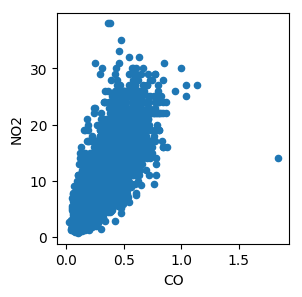

In [29]:
# 使用 .plot(kind='scatter') 畫出
# 一氧化碳 (column label: 'CO') 和二氧化氮 (column label: 'NO2') 的散佈圖
df.plot(x='CO', y='NO2', kind='scatter', figsize=(3,3)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1153f8a90>,
      dtype=object)

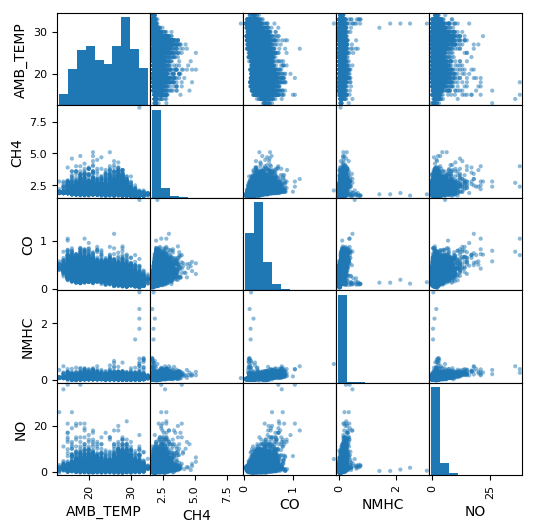

In [30]:
# 使用 pandas.plotting.scatter_matrix() 一次畫出
# 前 5 個 columns 彼此之間相關性的 scatter plots
pd.plotting.scatter_matrix(df.iloc[:, 0:5], figsize=(6, 6))

> 備註：
> 
> 說到畫圖，[Seaborn](https://seaborn.pydata.org) 也是另一個好用的套件，易學、美觀、好操作，這邊礙於篇幅暫不介紹，有興趣請自行移駕到官網去查看[用法](https://seaborn.pydata.org/tutorial.html)以及[可製作的圖表類型](https://seaborn.pydata.org/examples/index.html)。

In [31]:
df.corr()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,TSP
AMB_TEMP,1.000000,-0.095646,-0.468451,0.001008,-0.015063,-0.417328,-0.348231,-0.101718,-0.314486,-0.317030,0.133390,0.005317,-0.121470,-0.086171,0.514243,0.498228,-0.345507,-0.105941,-0.346544
CH4,-0.095646,1.000000,0.362825,0.309408,0.252842,0.379967,0.398310,-0.411632,0.056986,0.352514,-0.102160,0.319289,-0.063315,0.971905,-0.172335,-0.151524,-0.428081,-0.384884,0.141120
CO,-0.468451,0.362825,1.000000,0.381404,0.348639,0.773510,0.754048,-0.059893,0.326570,0.621914,-0.250728,-0.066057,0.420317,0.412593,-0.311470,-0.287179,-0.035901,-0.114789,0.437229
NMHC,0.001008,0.309408,0.381404,1.000000,0.325209,0.450259,0.481549,-0.206016,0.040781,0.284723,-0.128383,0.031436,0.201809,0.494980,0.068997,0.073267,-0.257790,-0.223547,0.110005
NO,-0.015063,0.252842,0.348639,0.325209,1.000000,0.377324,0.649451,-0.295095,0.002166,0.103593,-0.106511,0.058932,0.197894,0.300532,0.014144,0.025690,-0.135503,-0.155452,0.030613
NO2,-0.417328,0.379967,0.773510,0.450259,0.377324,1.000000,0.948088,-0.235557,0.129795,0.428475,-0.209726,-0.034192,0.574450,0.442800,-0.241293,-0.224188,-0.158907,-0.204154,0.221738
NOx,-0.348231,0.398310,0.754048,0.481549,0.649451,0.948088,1.000000,-0.294146,0.107051,0.387123,-0.213853,-0.007901,0.538303,0.466453,-0.193207,-0.175685,-0.176970,-0.220944,0.192241
O3,-0.101718,-0.411632,-0.059893,-0.206016,-0.295095,-0.235557,-0.294146,1.000000,0.366435,0.223437,0.011866,-0.575484,0.114086,-0.422478,-0.012214,-0.016854,0.419541,0.201333,0.364012
PM10,-0.314486,0.056986,0.326570,0.040781,0.002166,0.129795,0.107051,0.366435,1.000000,0.534233,-0.236361,-0.292571,0.111875,0.061689,-0.248628,-0.226037,0.435866,0.278262,0.974828
PM2.5,-0.317030,0.352514,0.621914,0.284723,0.103593,0.428475,0.387123,0.223437,0.534233,1.000000,-0.223155,-0.120849,0.243551,0.382286,-0.147249,-0.120557,-0.097286,-0.201875,0.709260


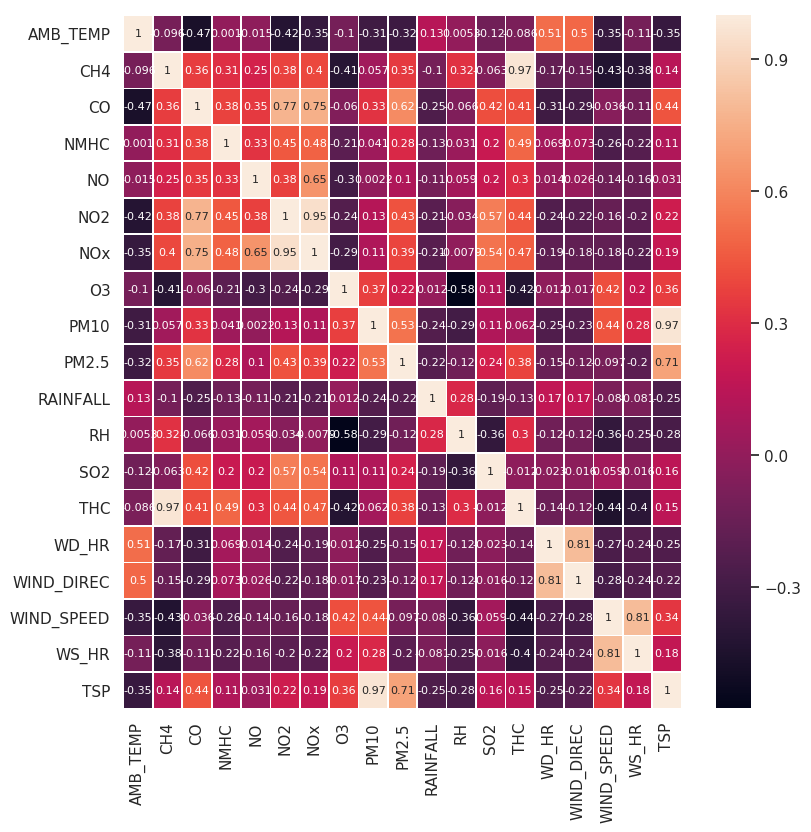

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True, annot_kws={'fontsize': 8}, linewidths=.5, ax=ax)

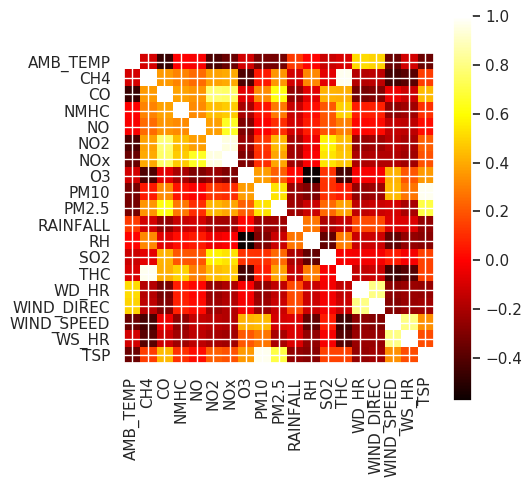

In [33]:
plt.figure(figsize=(5,5))
plt.imshow(df.corr(), cmap='hot', interpolation='nearest')
plt.xticks(range(len(df.columns)), df.columns, rotation=90) # rotation (文字)旋轉角度
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

### `.idxmin()`, `idxmax()`：回傳最小值或最大值的 Index Label

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return：Series
* 參考文件：
    * [pandas.DataFrame.idxmin](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmin.html)
    * [pandas.DataFrame.idxmax](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html)
    * [pandas.Series.idxmin](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmin.html)
    * [pandas.Series.idxmax](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html)



In [34]:
# 找出非甲烷碳氫化合物 (column label: 'NMHC') 最小值的 index label
df.loc[:, 'NMHC'].idxmin()

Timestamp('2017-03-26 06:00:00')

In [35]:
# 之後就可以拿來找尋當時的資料狀況
time_mnhc_min = df.loc[:, 'NMHC'].idxmin()
df.loc[time_mnhc_min, :]

AMB_TEMP      15.00
CH4            2.10
CO             0.30
NMHC          -0.03
NO             1.70
NO2            6.80
NOx            8.50
O3            46.00
PM10          25.00
PM2.5         16.00
RAINFALL        NaN
RH            82.00
SO2            2.20
THC            2.00
WD_HR         65.00
WIND_DIREC    62.00
WIND_SPEED     5.30
WS_HR          2.30
TSP           41.00
Name: 2017-03-26 06:00:00, dtype: float64